<a href="https://colab.research.google.com/github/omkarjaliparthi/testrepo/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv('creditcard.csv')

# Normalize 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

# Balance classes with SMOTE
X = df.drop('Class', axis=1)
y = df['Class']

# ----> Added lines to handle NaN values in 'y' <----
# Check if 'y' contains NaN values
if y.isnull().any():
    # Remove rows with NaN values in 'y' from both X and y
    X = X[~y.isnull()]  # Use boolean indexing to keep non-NaN rows
    y = y[~y.isnull()]  # Use boolean indexing to keep non-NaN rows
# ----> End of added lines <----


smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_res.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision', 'Recall'])

# Train the model
history = model.fit(X_res, y_res, epochs=20, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4451/4451 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - Precision: 0.9766 - Recall: 0.9619 - loss: 0.0632 - val_Precision: 1.0000 - val_Recall: 0.9999 - val_loss: 0.0047
Epoch 2/20
4451/4451 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - Precision: 0.9976 - Recall: 0.9996 - loss: 0.0051 - val_Precision: 1.0000 - val_Recall: 0.9988 - val_loss: 0.0037
Epoch 3/20
4451/4451 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - Precision: 0.9985 - Recall: 0.9997 - loss: 0.0033 - val_Precision: 1.0000 - val_Recall: 0.9952 - val_loss: 0.0154
Epoch 4/20
4451/4451 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - Precision: 0.9988 - Recall: 0.9995 - loss: 0.0027 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_loss: 3.4920e-04
Epoch 5/20
4451/4451 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - Precision: 0.9990 - Recall: 0.9998 - loss: 0.0020 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_loss: 4.2866e-04
Epoch 6/20
4451/4451 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Precision: 0.9990 - Recall: 0.9997 - loss: 0.0022 - val_Precision: 1.0000 - val_R

In [7]:
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(10, activation='relu'),  # Bottleneck layer
    Dense(64, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X[y == 0], X[y == 0], epochs=10, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8227 - val_loss: 1.0000
Epoch 2/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7276 - val_loss: 0.9857
Epoch 3/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.7127 - val_loss: 0.9739
Epoch 4/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7112 - val_loss: 0.9703
Epoch 5/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7221 - val_loss: 0.9669
Epoch 6/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7226 - val_loss: 0.9642
Epoch 7/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7157 - val_loss: 0.9616
Epoch 8/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7147 - val_loss: 0.9581
Epoch 9/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6944 - val_loss: 0.9585
Epoch 10/10
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7114 - val_loss: 0.9564


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Load data
df = pd.read_csv('creditcard.csv')

# Normalize 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

# Balance classes with SMOTE
X = df.drop('Class', axis=1)
y = df['Class']

# ----> Added lines to handle NaN values in 'y' <----
# Check if 'y' contains NaN values
if y.isnull().any():
    # Remove rows with NaN values in 'y' from both X and y
    X = X[~y.isnull()]  # Use boolean indexing to keep non-NaN rows
    y = y[~y.isnull()]  # Use boolean indexing to keep non-NaN rows
# ----> End of added lines <----


smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42) # Split the resampled data

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_res.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision', 'Recall'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2) # Train on X_train and y_train


# Make predictions
y_pred = model.predict(X_test).round() # Predict on X_test
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred)) # Evaluate on y_test

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - Precision: 0.9706 - Recall: 0.9664 - loss: 0.0782 - val_Precision: 0.9969 - val_Recall: 1.0000 - val_loss: 0.0070
Epoch 2/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - Precision: 0.9974 - Recall: 0.9997 - loss: 0.0068 - val_Precision: 0.9989 - val_Recall: 0.9997 - val_loss: 0.0051
Epoch 3/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - Precision: 0.9984 - Recall: 0.9997 - loss: 0.0044 - val_Precision: 0.9985 - val_Recall: 1.0000 - val_loss: 0.0031
Epoch 4/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - Precision: 0.9988 - Recall: 0.9997 - loss: 0.0032 - val_Precision: 0.9992 - val_Recall: 0.9966 - val_loss: 0.0060
Epoch 5/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - Precision: 0.9990 - Recall: 0.9997 - loss: 0.0024 - val_Precision: 0.9996 - val_Recall: 1.0000 - val_loss: 0.0023
Epoch 6/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - Precision: 0.9991 - Recall: 0.9998 - loss: 0.0026 - val_Precision: 0.9991 - val_Recall: 

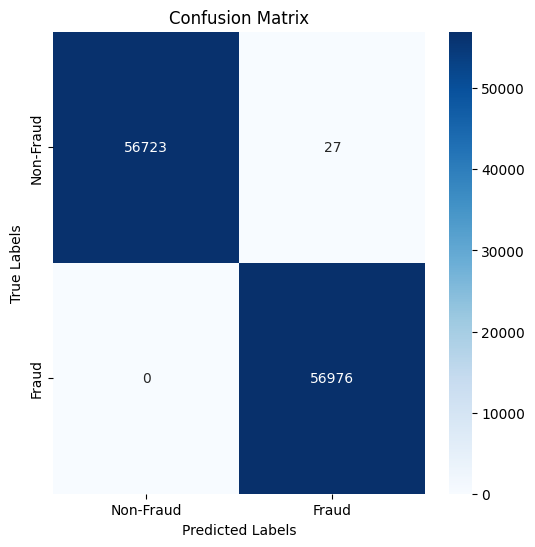

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
